### Car Price Linear Regression case study ###
### --------------------------------------------------------- ###

##### -by Komala Srivastava #####

In [1]:
# filter warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read csv
car_df = pd.read_csv("CarPrice_Assignment.csv")

In [4]:
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [6]:
car_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


#### The dataset does not contain null values ####

#### Data Cleaning ####

In [7]:
# Drop the car_id column
car_df.drop('car_ID', inplace=True, axis=1)

In [8]:
#Removing duplicate entries. Categorical variables considered for identifying duplicate rows
car_df.drop_duplicates(subset=list(car_df.columns[car_df.dtypes == 'object']),keep='first', inplace=True)

In [9]:
car_df.shape

(191, 25)

In [10]:
# Convert all the entries to lower case
car_df['CarName'] = car_df['CarName'].str.lower()

# Split CarName to get Car Manufacturer Name
car_df['carBrand'] = car_df['CarName'].str.split(" ").str[0]

#Drop CarName column
car_df.drop('CarName', inplace=True, axis=1)


In [11]:
car_df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carBrand
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [12]:
car_df['carBrand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [13]:
# Replacing vokswagen, vw with volkswagen- toyouta with toyota, porcshce with porsche, maxda with mazda, 
car_df.carBrand.replace('maxda','mazda',inplace=True)
car_df.carBrand.replace('vw', 'volkswagen', inplace=True)
car_df.carBrand.replace('vokswagen', 'volkswagen', inplace=True)
car_df.carBrand.replace('vokswagen', 'volkswagen', inplace=True)
car_df.carBrand.replace('toyouta', 'toyota', inplace=True)
car_df.carBrand.replace('porcshce', 'porsche', inplace=True)


#### Data Analysis ####

##### Visualising the data #####

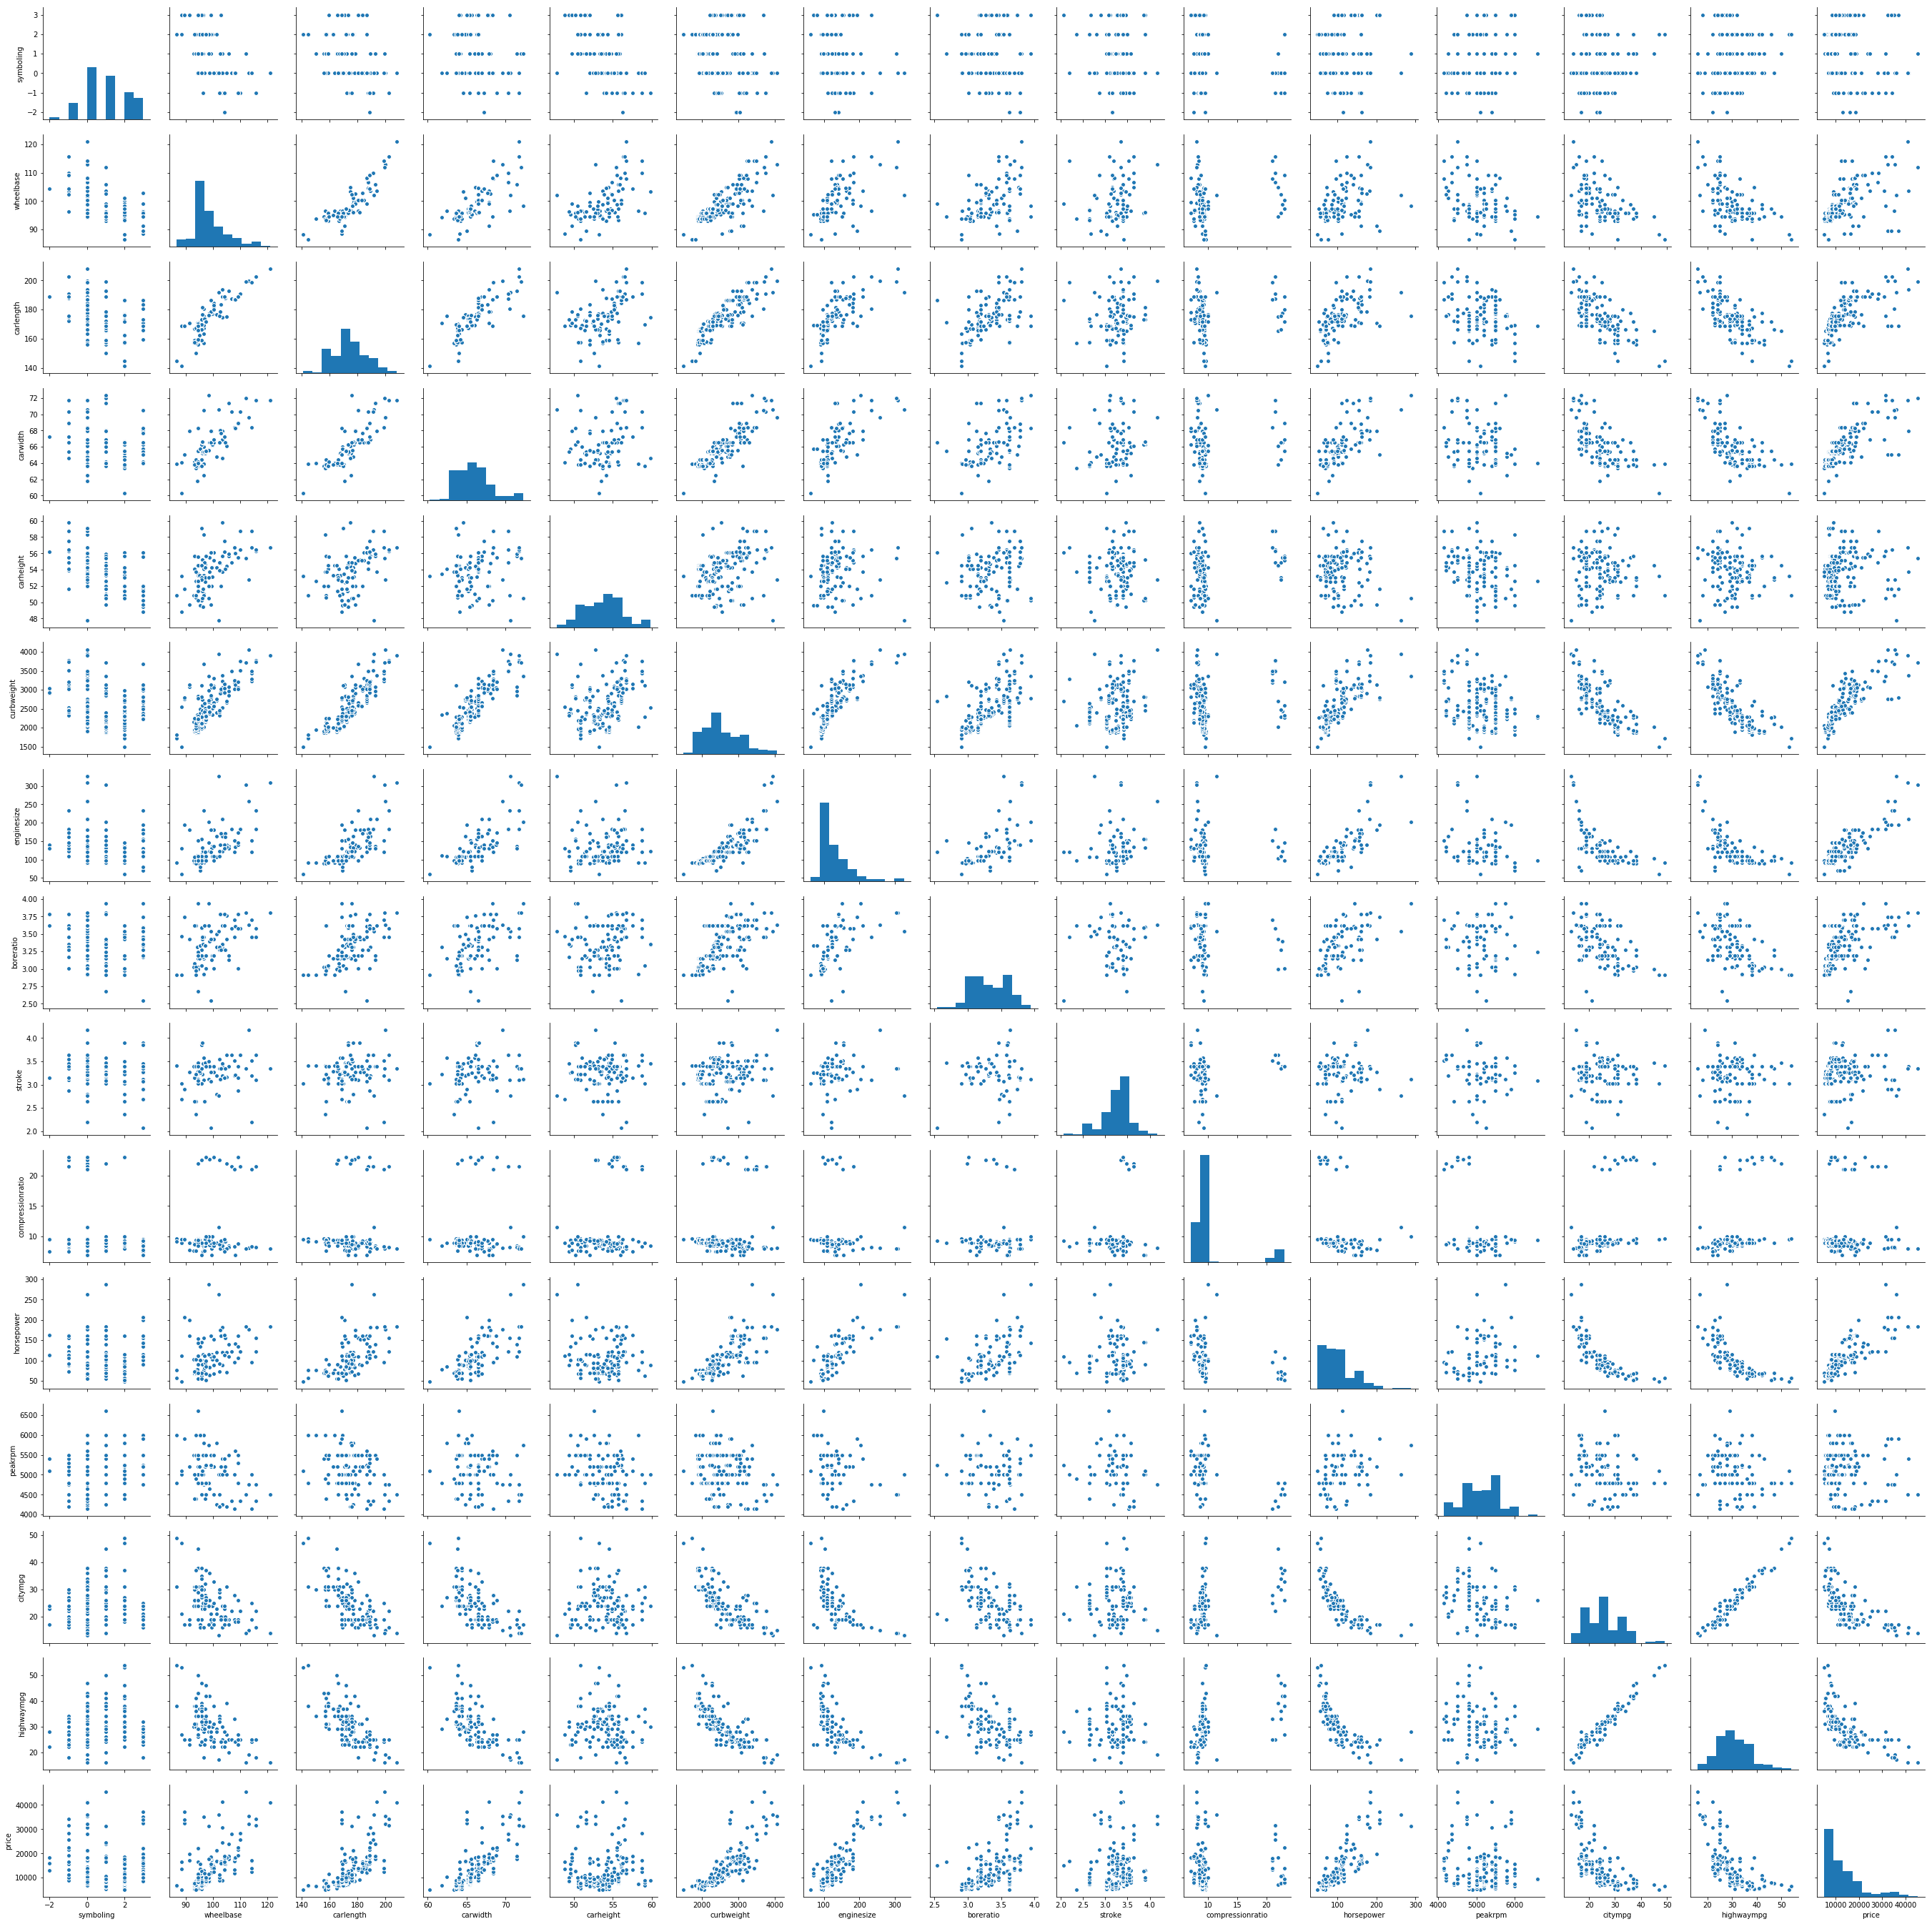

In [14]:
# pairplot
sns.pairplot(car_df)
plt.show()

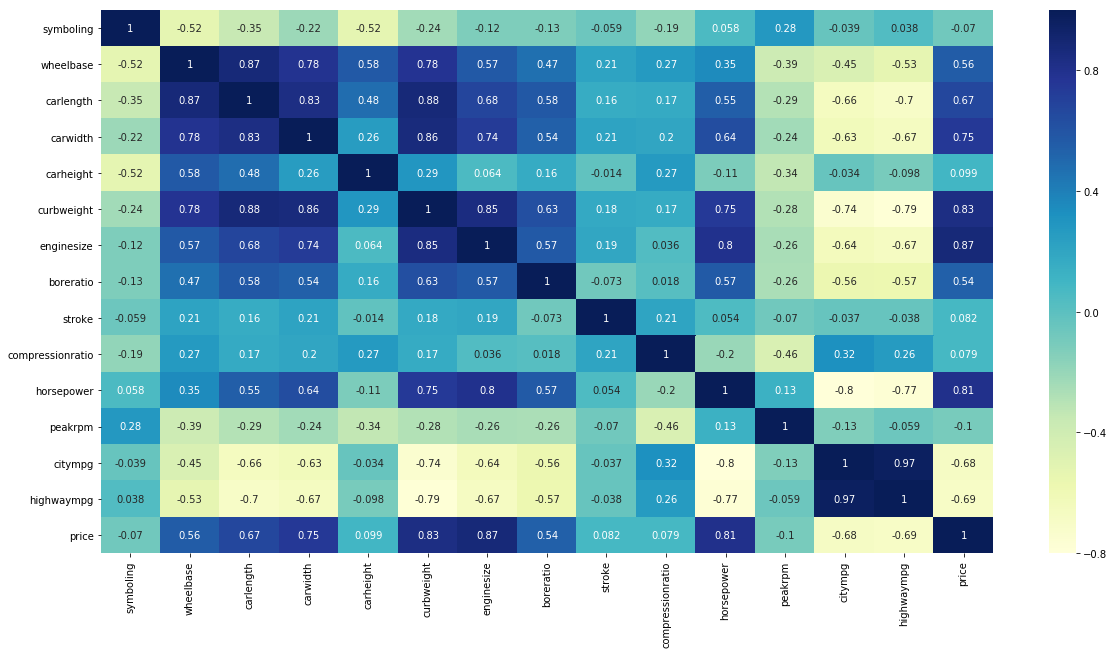

In [15]:
# plot heatmap
plt.figure(figsize = (20, 10))
sns.heatmap(car_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

##### Following variables are highly correlated with price #####
- enginesize 
- horsepower 
- curbweight 
- carwidth 
- carlength 
- boreratio 
- wheelbase 

Also there is strong negative correlation with 
- citympg
- highwaympg

There are areas of strong positive correlation
- horsepower with enginesize and curbweight
- curbweight with carlength and carweight
- citympg with highwaympg

There are areas of negative correlations
- citympg/highwaympg with all the parameters except compressionratio



#### Visualising the categorical variables ####

In [16]:
#listing the categorical variables
car_df.columns[car_df.dtypes == 'object']

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'carBrand'],
      dtype='object')

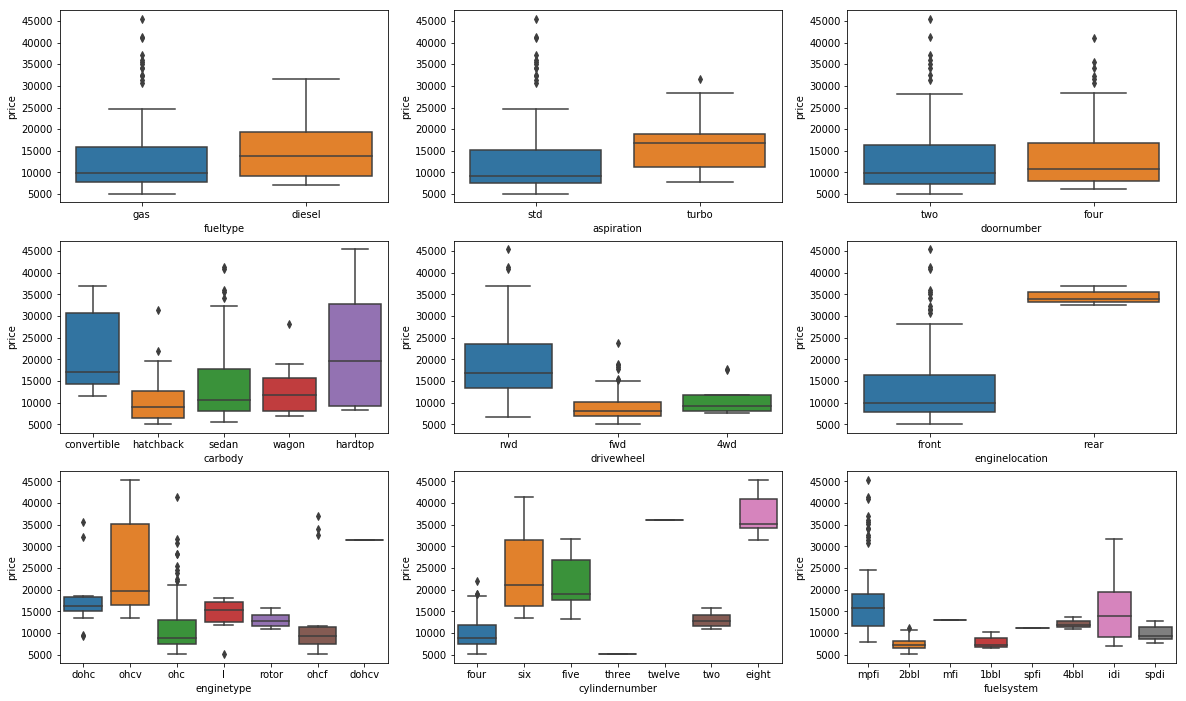

In [17]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = car_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = car_df)
plt.subplot(3,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = car_df)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = car_df)
plt.subplot(3,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = car_df)
plt.subplot(3,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = car_df)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = car_df)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car_df)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car_df)
plt.show()

Clearly cars with following feature are priced higher than the others
- Enginelocation : rear
- Drivewheel : rear wheel drive
- Carbody : convertible/hardtop
- enginetype : ohcv
- cylindernumber : eight

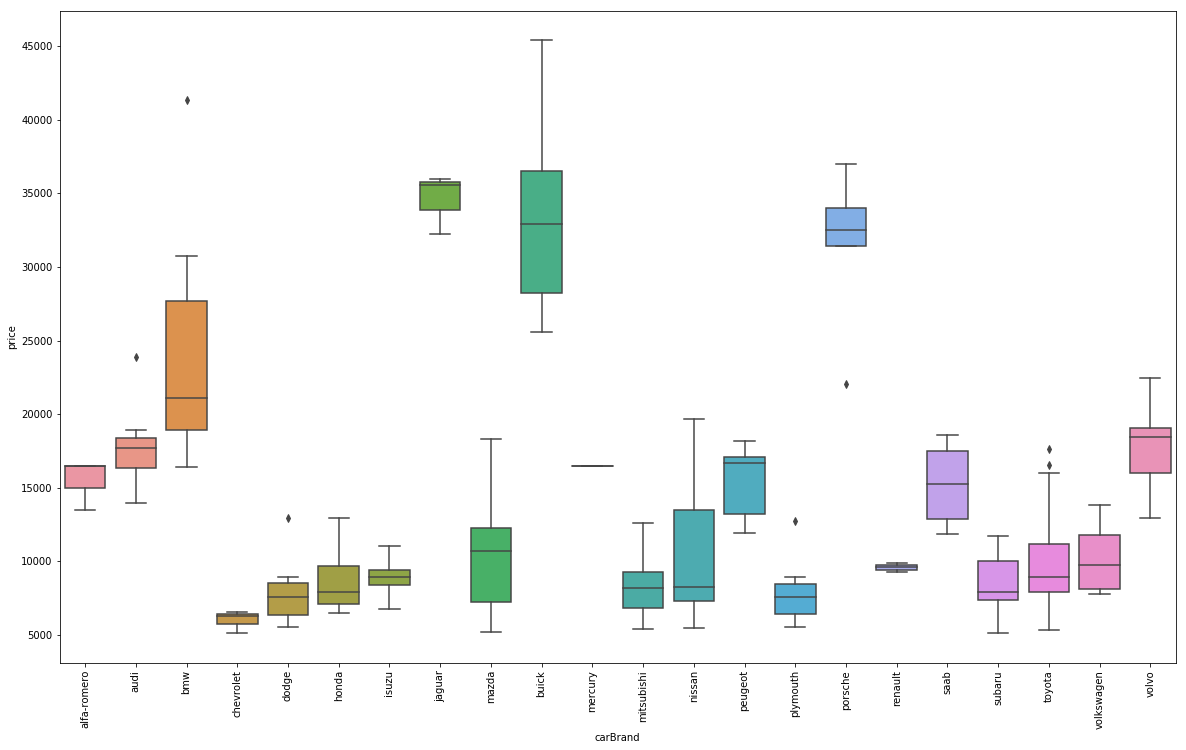

In [18]:
plt.figure(figsize=(20, 12))
sns.boxplot(x = 'carBrand', y = 'price', data = car_df)
plt.xticks(rotation=90)
plt.show()

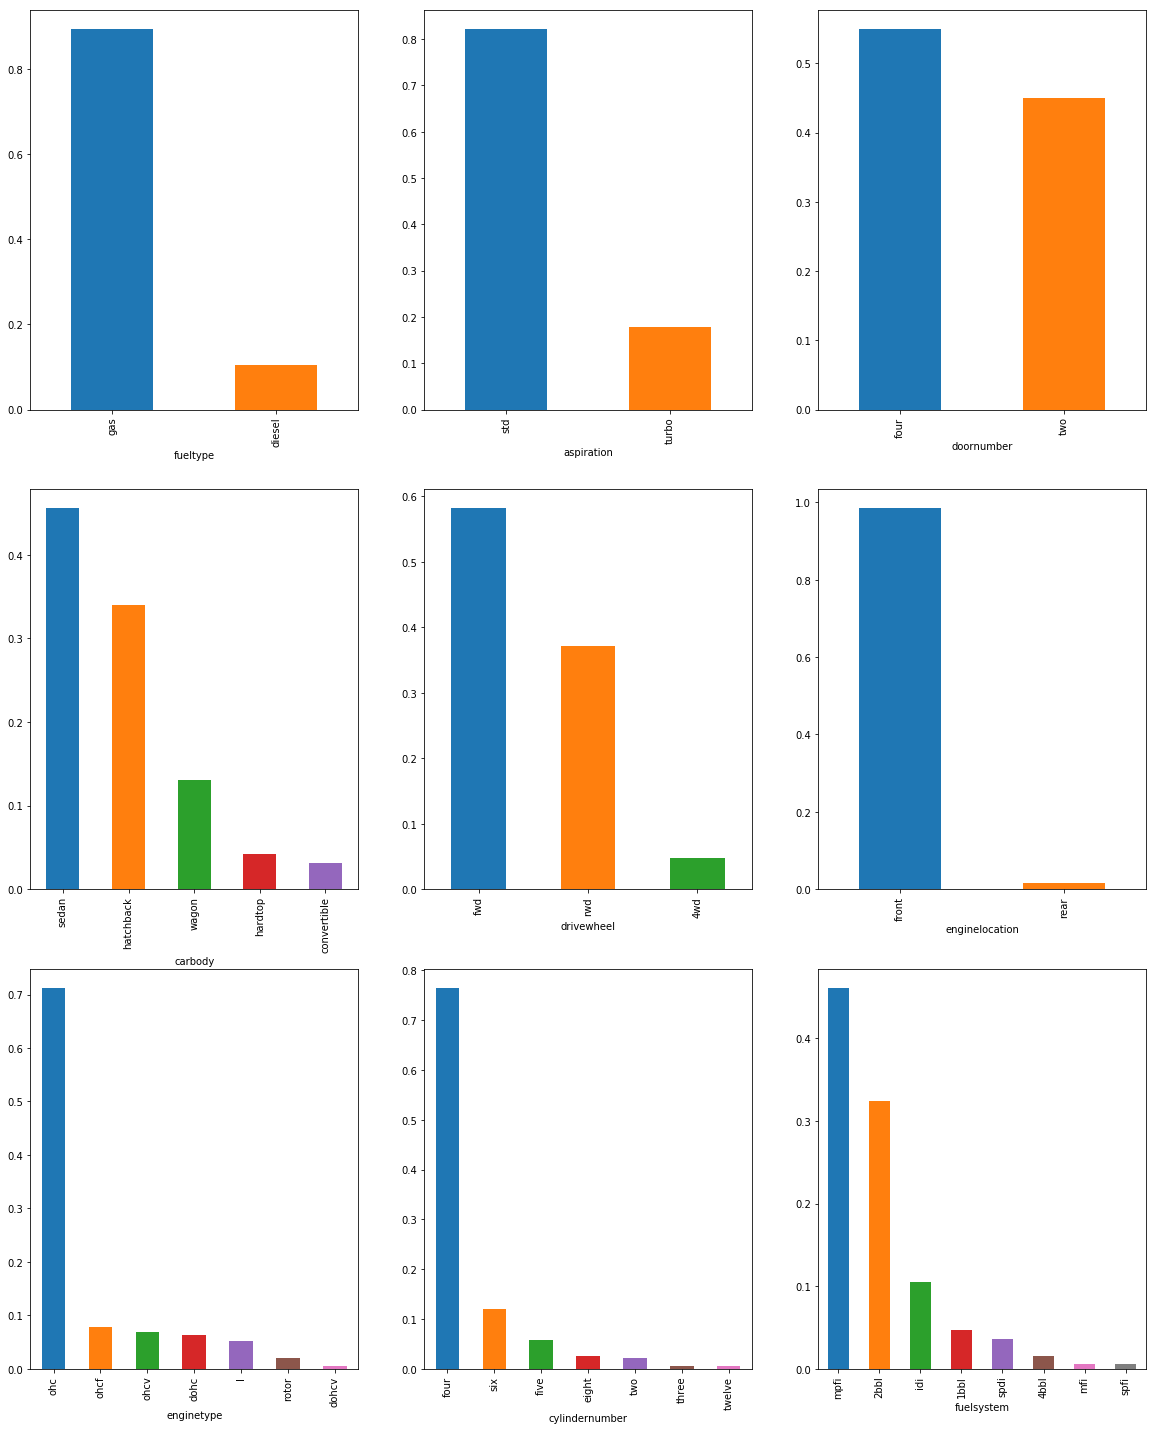

In [19]:
#Market share w.r.t car features
plt.figure(figsize=(20, 25))
plt.subplot(3,3,1)
car_df['fueltype'].value_counts(normalize=True).plot.bar()
plt.xlabel("fueltype")
plt.subplot(3,3,2)
car_df['aspiration'].value_counts(normalize=True).plot.bar()
plt.xlabel("aspiration")
plt.subplot(3,3,3)
car_df['doornumber'].value_counts(normalize=True).plot.bar()
plt.xlabel("doornumber")
plt.subplot(3,3,4)
car_df['carbody'].value_counts(normalize=True).plot.bar()
plt.xlabel("carbody")
plt.subplot(3,3,5)
car_df['drivewheel'].value_counts(normalize=True).plot.bar()
plt.xlabel("drivewheel")
plt.subplot(3,3,6)
car_df['enginelocation'].value_counts(normalize=True).plot.bar()
plt.xlabel("enginelocation")
plt.subplot(3,3,7)
car_df['enginetype'].value_counts(normalize=True).plot.bar()
plt.xlabel("enginetype")
plt.subplot(3,3,8)
car_df['cylindernumber'].value_counts(normalize=True).plot.bar()
plt.xlabel("cylindernumber")
plt.subplot(3,3,9)
car_df['fuelsystem'].value_counts(normalize=True).plot.bar()
plt.xlabel("fuelsystem")
plt.show()


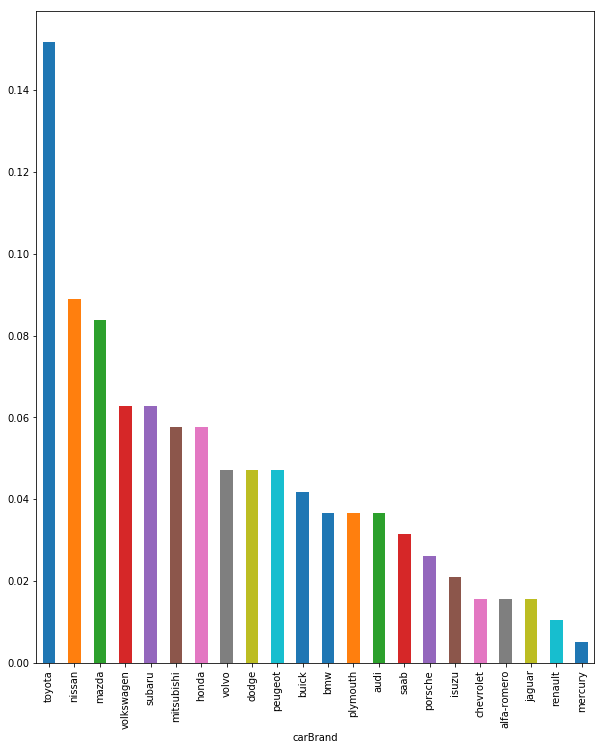

In [20]:
plt.figure(figsize=(10, 12))
car_df['carBrand'].value_counts(normalize=True).plot.bar()
plt.xlabel("carBrand")
plt.show()


- Toyota 
- Frotwheel drive
- Engine location : front
- Engine Type : ohc
- cylindernumber : four
- carbody :sedan

Trend shows that low priced features/cars are given preference over the high priced ones. People pay for what is desired and very few opt for exciting features which may pe priced high.

### Data Preparation ###

#### Deriving new column ####

In [21]:
#Fuel economy : https://en.wikipedia.org/wiki/Fuel_economy_in_automobiles#EPA_testing_procedure:_2008_and_beyond for USA
# Weighted average of city and highway fuel economies
# cars['fueleconomy'] = (0.55 * cars['citympg']) + (0.45 * cars['highwaympg'])
car_df['fueleconomy'] = (0.55 * car_df['citympg']) + (0.45 * car_df['highwaympg'])
car_df.drop('citympg', axis=1, inplace=True)
car_df.drop('highwaympg', axis=1, inplace=True)

Convert Symboling from numerical to categorical.AS per data dictionary,a value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.<br>
Let's make the category clear by classifying based on risk
-  -ve symboling as __safe__
-  0, 1 as **moderate**
-  2,3 as **risky** 

In [22]:
car_df['symboling'] = car_df['symboling'].map({-2: 'safe',-1: 'safe',0: 'moderate',1: 'moderate',2: 'risky',3:'risky'})

In [23]:
# Converting cylinder number to numeric value
car_df['cylindernumber'] = car_df['cylindernumber'].map({"two":2,"three":3,"four":4,"five":5,"six":6,"eight":8,"twelve":12})

#### Handling categorical variable for Linear Regression #####

In [24]:
# Converting categorical variables with two levels to either 1 or 0
car_df['fueltype'] = car_df['fueltype'].map({'gas': 1, 'diesel': 0})
car_df['aspiration'] = car_df['aspiration'].map({'std': 1, 'turbo': 0})
car_df['doornumber'] = car_df['doornumber'].map({'two': 1, 'four': 0})
car_df['enginelocation'] = car_df['enginelocation'].map({'front': 1, 'rear': 0})
car_df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,carBrand,fueleconomy
0,risky,1,1,1,convertible,rwd,1,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,alfa-romero,23.70
1,risky,1,1,1,convertible,rwd,1,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,alfa-romero,23.70
2,moderate,1,1,1,hatchback,rwd,1,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,alfa-romero,22.15
3,risky,1,1,0,sedan,fwd,1,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,audi,26.70
4,risky,1,1,0,sedan,4wd,1,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,audi,19.80


In [25]:
# Creating dummy variables.
car_df_cleaned = pd.get_dummies(car_df, drop_first=True)
car_df_cleaned.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'price', 'fueleconomy', 'symboling_risky', 'symboling_safe',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'carBrand_audi', 'carBrand_bmw',
       'carBrand_buick', 'carBrand_chevrolet', 'carBrand_dodge',
       'carBrand_honda', 'carBrand_isuzu', 'carBrand_jaguar', 'carBrand_mazda',
       'carBrand_mercury', 'carBrand_mitsubishi', 'carBrand_nissan',
       'carBrand_peugeot', 'carBrand_plymouth'

In [26]:
car_df_cleaned.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,...,carBrand_nissan,carBrand_peugeot,carBrand_plymouth,carBrand_porsche,carBrand_renault,carBrand_saab,carBrand_subaru,carBrand_toyota,carBrand_volkswagen,carBrand_volvo
0,1,1,1,1,88.6,168.8,64.1,48.8,2548,4,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,88.6,168.8,64.1,48.8,2548,4,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,94.5,171.2,65.5,52.4,2823,6,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,99.8,176.6,66.2,54.3,2337,4,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,99.4,176.6,66.4,54.3,2824,5,...,0,0,0,0,0,0,0,0,0,0


### Model Building ###


#### Splitting the data into test-train ####

In [27]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(car_df_cleaned, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Min-Max scaling ####

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()

In [30]:
num_vars = ['cylindernumber','wheelbase', 'carheight', 'curbweight','carlength','carwidth','enginesize','boreratio', 'stroke','compressionratio','horsepower','peakrpm','fueleconomy','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [31]:
df_train.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,...,carBrand_nissan,carBrand_peugeot,carBrand_plymouth,carBrand_porsche,carBrand_renault,carBrand_saab,carBrand_subaru,carBrand_toyota,carBrand_volkswagen,carBrand_volvo
69,0,0,1,1,0.586006,0.692537,0.833333,0.554545,0.778510,0.500000,...,0,0,0,0,0,0,0,0,0,0
78,1,1,1,1,0.206997,0.241791,0.341667,0.181818,0.200155,0.333333,...,0,0,0,0,0,0,0,0,0,0
95,1,1,1,1,0.230321,0.365672,0.291667,0.409091,0.209465,0.333333,...,1,0,0,0,0,0,0,0,0,0
87,1,0,0,1,0.282799,0.467164,0.425000,0.254545,0.354926,0.333333,...,0,0,0,0,0,0,0,0,0,0
203,0,0,0,1,0.655977,0.711940,0.716667,0.609091,0.670675,0.666667,...,0,0,0,0,0,0,0,0,0,1


In [32]:
df_train.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,...,carBrand_nissan,carBrand_peugeot,carBrand_plymouth,carBrand_porsche,carBrand_renault,carBrand_saab,carBrand_subaru,carBrand_toyota,carBrand_volkswagen,carBrand_volvo
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,...,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,0.887218,0.819549,0.413534,0.992481,0.358579,0.492964,0.469925,0.451606,0.409509,0.395990,...,0.082707,0.052632,0.030075,0.015038,0.007519,0.022556,0.082707,0.097744,0.075188,0.052632
std,0.317522,0.386017,0.494329,0.086711,0.183023,0.188398,0.184075,0.213554,0.203357,0.176003,...,0.276480,0.224141,0.171440,0.122162,0.086711,0.149046,0.276480,0.298091,0.264691,0.224141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.230321,0.383582,0.325000,0.290909,0.254849,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.303207,0.470149,0.433333,0.481818,0.354926,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.425656,0.602985,0.550000,0.609091,0.551590,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X and Y sets for the model building ####


In [33]:
y_train = df_train.pop('price')
X_train = df_train

### RFE ###
#### Recursive Feature Elimination ####

In [34]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [35]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE and selecting 15 features best describing the price of cars
rfe = rfe.fit(X_train, y_train)

In [36]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', True, 1),
 ('aspiration', False, 23),
 ('doornumber', False, 26),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', False, 10),
 ('curbweight', True, 1),
 ('cylindernumber', False, 35),
 ('enginesize', True, 1),
 ('boreratio', False, 3),
 ('stroke', False, 30),
 ('compressionratio', True, 1),
 ('horsepower', False, 39),
 ('peakrpm', True, 1),
 ('fueleconomy', False, 7),
 ('symboling_risky', False, 41),
 ('symboling_safe', False, 43),
 ('carbody_hardtop', False, 22),
 ('carbody_hatchback', False, 11),
 ('carbody_sedan', False, 13),
 ('carbody_wagon', False, 12),
 ('drivewheel_fwd', False, 44),
 ('drivewheel_rwd', False, 34),
 ('enginetype_dohcv', False, 37),
 ('enginetype_l', True, 1),
 ('enginetype_ohc', False, 27),
 ('enginetype_ohcf', False, 4),
 ('enginetype_ohcv', False, 36),
 ('enginetype_rotor', True, 1),
 ('fuelsystem_2bbl', False, 19),
 ('fuelsystem_4bbl', False, 38),
 ('fuelsystem_idi', False, 2

In [37]:
col = X_train.columns[rfe.support_]

In [38]:
col

Index(['fueltype', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'curbweight', 'enginesize', 'compressionratio', 'peakrpm',
       'enginetype_l', 'enginetype_rotor', 'carBrand_bmw', 'carBrand_buick',
       'carBrand_peugeot', 'carBrand_porsche'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [39]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [41]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary())
    

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     104.9
Date:                Mon, 27 May 2019   Prob (F-statistic):           2.18e-60
Time:                        17:38:46   Log-Likelihood:                 203.22
No. Observations:                 133   AIC:                            -374.4
Df Residuals:                     117   BIC:                            -328.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3067      0.166  

In [42]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
#Dropping variables with VIF inf
X_train_rfe_2 = X_train_rfe.drop(['compressionratio'], axis=1)

In [44]:
#Building second model
X_train_rfe_2 = sm.add_constant(X_train_rfe_2)
lm = sm.OLS(y_train,X_train_rfe_2).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     112.0
Date:                Mon, 27 May 2019   Prob (F-statistic):           3.91e-61
Time:                        17:38:46   Log-Likelihood:                 202.46
No. Observations:                 133   AIC:                            -374.9
Df Residuals:                     118   BIC:                            -331.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1435      0.089  

In [45]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_2.values, i) for i in range(X_train_rfe_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,332.51
6,curbweight,16.08
4,carlength,10.97
13,carBrand_peugeot,9.41
7,enginesize,9.09
9,enginetype_l,8.43
5,carwidth,8.38
3,wheelbase,7.19
14,carBrand_porsche,2.89
2,enginelocation,2.50


In [46]:
#Building third model
X_train_rfe_3 = X_train_rfe_2.drop(['carBrand_porsche'], axis=1) #p-value is 0.850 and VIF >5

In [47]:
#Building third model
X_train_rfe_3 = sm.add_constant(X_train_rfe_3)
lm = sm.OLS(y_train,X_train_rfe_3).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     120.4
Date:                Mon, 27 May 2019   Prob (F-statistic):           5.98e-62
Time:                        17:38:46   Log-Likelihood:                 201.85
No. Observations:                 133   AIC:                            -375.7
Df Residuals:                     119   BIC:                            -335.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2050      0.066  

In [48]:
#Building fourth model
X_train_rfe_4 = X_train_rfe_3.drop(['fueltype'], axis=1)

In [49]:
#Building 4th model
X_train_rfe_4 = sm.add_constant(X_train_rfe_4)
lm = sm.OLS(y_train,X_train_rfe_4).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     129.2
Date:                Mon, 27 May 2019   Prob (F-statistic):           1.40e-62
Time:                        17:38:46   Log-Likelihood:                 200.72
No. Observations:                 133   AIC:                            -375.4
Df Residuals:                     120   BIC:                            -337.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2072      0.067  

In [50]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_4.values, i) for i in range(X_train_rfe_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,185.53
5,curbweight,15.00
3,carlength,9.96
12,carBrand_peugeot,9.39
8,enginetype_l,8.37
6,enginesize,7.62
2,wheelbase,7.01
4,carwidth,6.70
11,carBrand_buick,2.13
7,peakrpm,1.44


In [51]:
#Building 5th model
X_train_rfe_5 = X_train_rfe_4.drop(['curbweight'], axis=1)


In [52]:
#Building 5th model
X_train_rfe_5 = sm.add_constant(X_train_rfe_5)
lm = sm.OLS(y_train,X_train_rfe_5).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     128.8
Date:                Mon, 27 May 2019   Prob (F-statistic):           2.68e-61
Time:                        17:38:47   Log-Likelihood:                 194.69
No. Observations:                 133   AIC:                            -365.4
Df Residuals:                     121   BIC:                            -330.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1802      0.069  

In [53]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_5.values, i) for i in range(X_train_rfe_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,182.86
11,carBrand_peugeot,9.33
7,enginetype_l,8.30
3,carlength,7.84
2,wheelbase,6.96
4,carwidth,5.80
5,enginesize,4.13
10,carBrand_buick,2.11
6,peakrpm,1.44
8,enginetype_rotor,1.25


In [54]:
#Building 6th model
X_train_rfe_6 = X_train_rfe_5.drop(['carlength'], axis=1)
#X_train_rfe_6 = X_train_rfe_5.drop(['curbweight'], axis=1)

In [55]:
#Building 6th model
X_train_rfe_6 = sm.add_constant(X_train_rfe_6)
lm = sm.OLS(y_train,X_train_rfe_6).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     142.4
Date:                Mon, 27 May 2019   Prob (F-statistic):           2.66e-62
Time:                        17:38:47   Log-Likelihood:                 194.47
No. Observations:                 133   AIC:                            -366.9
Df Residuals:                     122   BIC:                            -335.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1735      0.068  

In [56]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_6.values, i) for i in range(X_train_rfe_6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,178.39
10,carBrand_peugeot,9.26
6,enginetype_l,8.17
3,carwidth,4.85
2,wheelbase,4.06
4,enginesize,4.00
9,carBrand_buick,1.95
5,peakrpm,1.44
7,enginetype_rotor,1.25
1,enginelocation,1.20


In [57]:
#Building 7th model
X_train_rfe_7 = X_train_rfe_6.drop(['carBrand_peugeot'], axis=1)

In [58]:
#Building 7th model
X_train_rfe_7 = sm.add_constant(X_train_rfe_7)
lm = sm.OLS(y_train,X_train_rfe_7).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     147.0
Date:                Mon, 27 May 2019   Prob (F-statistic):           1.98e-61
Time:                        17:38:47   Log-Likelihood:                 189.50
No. Observations:                 133   AIC:                            -359.0
Df Residuals:                     123   BIC:                            -330.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1750      0.070  

In [59]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_7.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_7.values, i) for i in range(X_train_rfe_7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,178.38
3,carwidth,4.70
4,enginesize,3.95
2,wheelbase,3.91
9,carBrand_buick,1.87
5,peakrpm,1.44
6,enginetype_l,1.44
7,enginetype_rotor,1.25
1,enginelocation,1.19
8,carBrand_bmw,1.19


In [60]:
X_train_rfe_8 = X_train_rfe_7.drop(['enginetype_l'], axis=1)

In [61]:
X_train_rfe_8 = sm.add_constant(X_train_rfe_8)
lm = sm.OLS(y_train,X_train_rfe_8).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     166.6
Date:                Mon, 27 May 2019   Prob (F-statistic):           1.53e-62
Time:                        17:38:47   Log-Likelihood:                 189.46
No. Observations:                 133   AIC:                            -360.9
Df Residuals:                     124   BIC:                            -334.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1770      0.069  

In [62]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_8.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_8.values, i) for i in range(X_train_rfe_8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,176.10
3,carwidth,4.69
4,enginesize,3.82
2,wheelbase,3.14
8,carBrand_buick,1.81
5,peakrpm,1.42
6,enginetype_rotor,1.25
7,carBrand_bmw,1.18
1,enginelocation,1.17


In [63]:
X_train_rfe_9 = X_train_rfe_8.drop(['wheelbase'], axis=1)

In [64]:
X_train_rfe_9 = sm.add_constant(X_train_rfe_9)
lm = sm.OLS(y_train,X_train_rfe_9).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     190.9
Date:                Mon, 27 May 2019   Prob (F-statistic):           1.45e-63
Time:                        17:38:48   Log-Likelihood:                 189.13
No. Observations:                 133   AIC:                            -362.3
Df Residuals:                     125   BIC:                            -339.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1737      0.069  

In [65]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_9.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_9.values, i) for i in range(X_train_rfe_9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,175.43
3,enginesize,3.82
2,carwidth,2.87
7,carBrand_buick,1.81
4,peakrpm,1.31
5,enginetype_rotor,1.24
6,carBrand_bmw,1.16
1,enginelocation,1.15


### Residual Analysis of the train data ###

In [66]:
y_train_price = lm.predict(X_train_rfe_9)


In [67]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Errors')

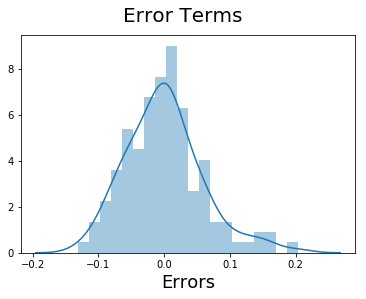

In [68]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Making Predictions ###

In [69]:
num_vars = ['cylindernumber','wheelbase', 'carheight', 'curbweight','carlength','carwidth','enginesize','boreratio', 'stroke','compressionratio','horsepower','peakrpm','fueleconomy','price']
df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and Y_test ####

In [70]:
y_test = df_test.pop('price')
X_test = df_test

In [71]:
X_train_rfe_9= X_train_rfe_9.drop(['const'], axis=1)
X_test_new = X_test[X_train_rfe_9.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [72]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0,0.5,'y_pred')

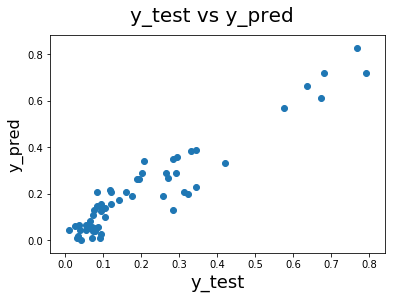

In [73]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [74]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Model RMSE:',rmse)

from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print('Model r2_score:',r2)

Model RMSE: 0.061395582113415996
Model r2_score: 0.8999096559102869


r2_score on the test data is very close to the trained Adj. R-Squared value of the model. we have a significantly high r2_score and a low RMSE of 0.061.

### Summary ###

The final predictors for car price are :- 

With low p value and VIF<5 are 

In [75]:
lm.params

const               0.173651
enginelocation     -0.367943
carwidth            0.374307
enginesize          0.622550
peakrpm             0.087103
enginetype_rotor    0.127264
carBrand_bmw        0.235189
carBrand_buick      0.137073
dtype: float64

The final equation for the best fit line is :-

**$ price = 0.174 - 0.368 \times enginelocation + 0.37 \times carwidth + 0.62 \times enginesize + 0.087 \times peakrpm + 0.127 \times enginetype_rotor +           0.23 \times carBrand_bmw + 0.137 \times carBrand_buick $**

The above equation indicates the factors which drive the car price.With an adjusted R2 in the 0.89 to 0.91 the model can explain ~90% of the variance.
carBrand BMW & BUICK maybe combined together in a high tier segment for a more rational model.Hightier brand names increase the price of the model.

In addition to the above factors Geely Automotive should keep the following preferences in mind while designing models
 - fueltype : gas
 - aspiration : std
 - doornumber : four
 - carbody : sedan
 - drivewheel : fwd
 - enginelocation : front
 - enginetype : ohc
 - cylindernumber : 4
 - fuelsystem : mpfi
 - carBrand : toyota

Most of the options people prefer are the lower priced options. Exciting features are opted for by a few. 
Cars are a neccessity for many and few use it as a luxury